1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


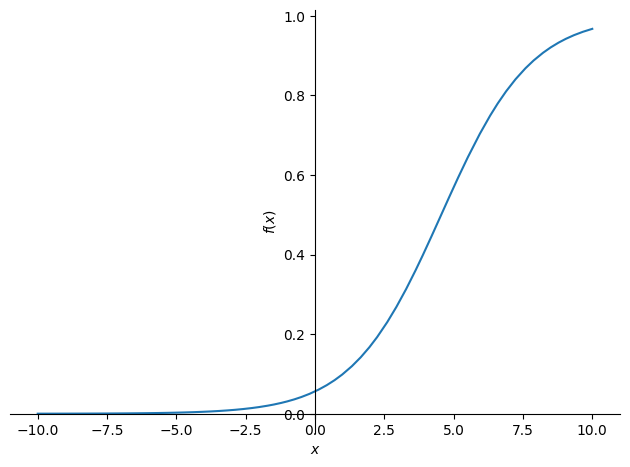

In [6]:
# Code 1.0

from sympy import symbols, exp, plot
b0, b1, x = symbols('b0 b1 x')
p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print(p)
plot(p)


[0.6393724]
[-2.91549752]


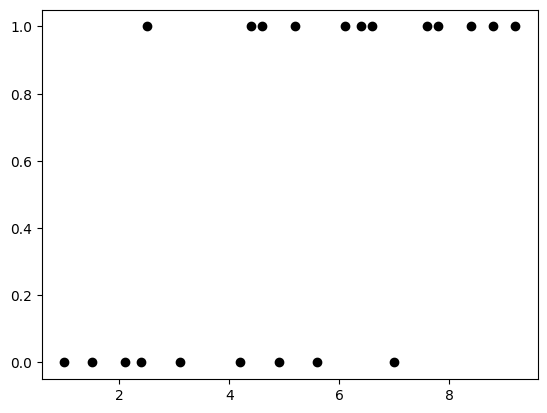

In [5]:
# Code 2.0

import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Perform logistic regression
# Turn off penalty
model = LogisticRegression(penalty='none')
model.fit(X, Y)
# Plot the data
plt.scatter(X, Y, color='black')
# print beta1
print(model.coef_.flatten())  # 0.69267212
# print beta0
print(model.intercept_.flatten())  # -3.17576395


In [2]:
# Code 3.0

import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]
# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]

# build logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)
# Print coefficients:

print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities)
    else:
        return "WILL STAY: {0}".format(probabilities)

(sex, age, promotions, years_employed) = (0, 90, 4, 10)

print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))

COEFFICIENTS: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
INTERCEPT: [-2.73485302]
WILL LEAVE: [[0.42428199 0.57571801]]


c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [6]:
# Code 4.0

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
# Load the data
df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")
X = df.values[:, :-1]
Y = df.values[:, -1]
# "random_state" is the random seed, which we fix to 7
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty='none')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy Mean: %.3f (stdev=%.3f)" % (results.mean(), results.std()))

Accuracy Mean: 0.611 (stdev=0.000)


c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [7]:
# Code 5.0

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Load the data
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]
model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,
                                                    random_state=10)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
"""
The confusion matrix evaluates accuracy within each category.
[[truepositives falsenegatives]
[falsepositives truenegatives]]
The diagonal represents correct predictions,
so we want those to be higher
"""
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [4 5]]
